<a href="https://colab.research.google.com/github/Mehradtavana/DeepLearning/blob/main/Tavanamehr_M_Recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
folder = '/content/drive/MyDrive/course8_RL/project_data'
f1 = '/test.csv'
f2 = '/user.csv'
f3 = '/relationship.csv'
f4 = '/content.csv'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_user = pd.read_csv(folder+f2)
df_relation = pd.read_csv(folder+f3)
df_content = pd.read_csv(folder+f4)

#### exploration and data malipulation of df_user dataset

In [5]:
print(df_user.shape)
df_user.head()

(13843, 5)


,user_id,user_age,gender,location,joining_date
0,user_45028@domain.com,40,M,Goa,2018-06-18
1,user_95235@domain.com,55,F,Andhra Pradesh,2019-09-17
2,user_44289@domain.com,38,F,Goa,2018-09-03
3,user_23708@domain.com,47,F,West Bengal,2020-11-15
4,user_40584@domain.com,24,M,Tamil Nadu,2018-02-06


In [6]:
# extract and add id from user_id and named user_no
df_user['user_no'] = df_user['user_id'].apply(lambda x: int(x[x.rfind('_')+1:x.rfind('@')]))

In [7]:
# check the unique of id in user_id
df_user['user_no'].groupby(df_user.user_no).count().sort_values(ascending=False)

user_no
8        1
66531    1
66417    1
66444    1
66454    1
        ..
33655    1
33657    1
33658    1
33660    1
99974    1
Name: user_no, Length: 13843, dtype: int64

In [8]:
# need to grouping the ages to can work with and better explotation
def age_range(row):
    if row['user_age'] in range(0, 20):
        age_range = "0-20"
    elif row['user_age'] in range(20, 30):
        age_range = "20-30"
    elif row['user_age'] in range(30, 40):
        age_range = "30-40"
    elif row['user_age'] in range(40, 50):
        age_range = "40-50"
    elif row['user_age'] in range(50, 60):
        age_range = "50-60"
    elif row['user_age'] in range(60, 100):
        age_range = "Above 60"

    return age_range


df_user["age_range"] = df_user.apply(age_range, axis=1)

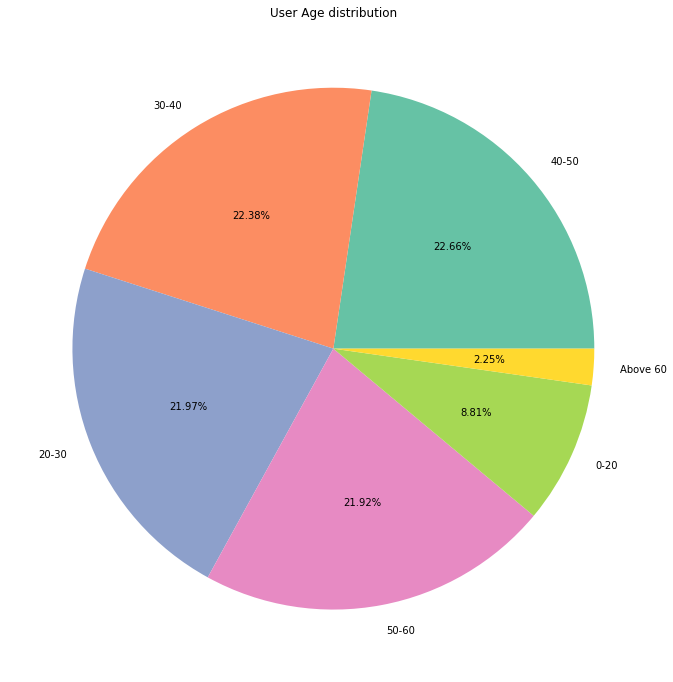

In [9]:
# exploration based on age range
colors = sns.color_palette('Set2')[0:10]
plt.figure(figsize=(20, 12))
plt.pie(df_user['age_range'].value_counts(),
        labels=df_user['age_range'].value_counts().keys(),
        colors=colors,
        autopct='%0.2f%%')
plt.title('User Age distribution')
plt.show()

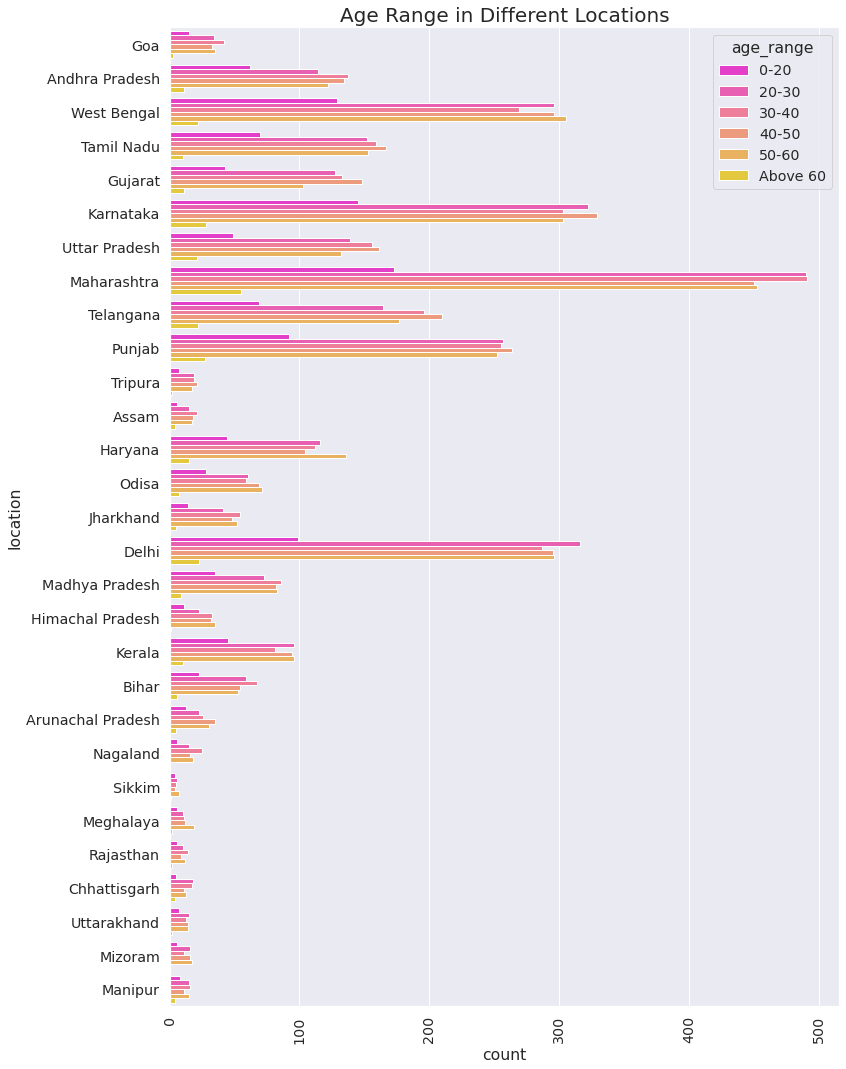

In [10]:
sns.set(font_scale=1.3)
plt.figure(figsize=(12, 18))
plt.xticks(rotation=90)
plt.title("Age Range in Different Locations", fontsize=20)
hue_order = ['0-20', '20-30', '30-40', '40-50', '50-60', 'Above 60']
sns.countplot(
    y='location',
    hue='age_range',
    data=df_user,
    hue_order=hue_order,
    palette='spring')

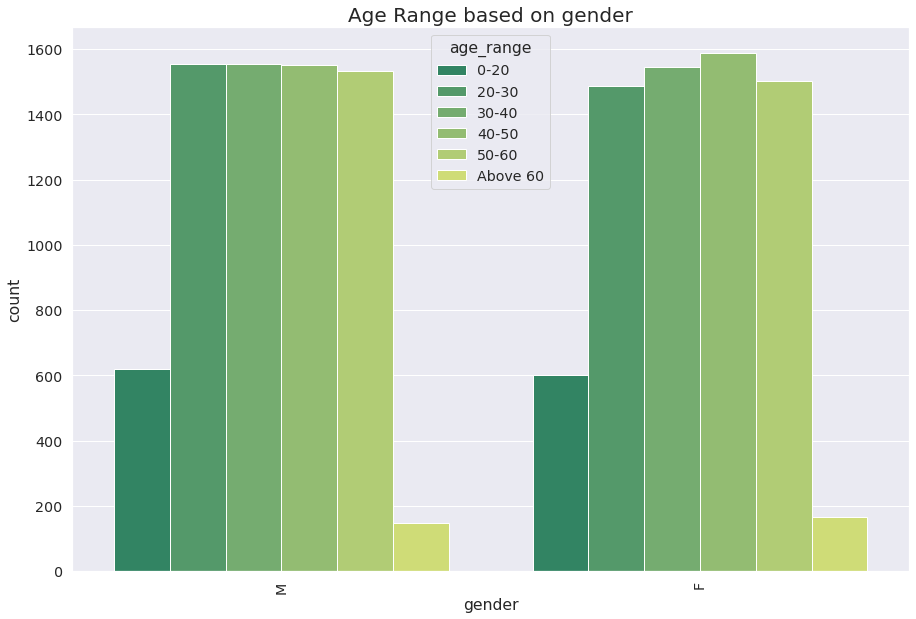

In [11]:
sns.set(font_scale=1.3)
plt.figure(figsize=(15, 10))
plt.xticks(rotation=90)
plt.title("Age Range based on gender", fontsize=20)
hue_order = ['0-20', '20-30', '30-40', '40-50', '50-60', 'Above 60']
sns.countplot(
    x='gender',
    hue='age_range',
    data=df_user,
    hue_order=hue_order,
    palette='summer')

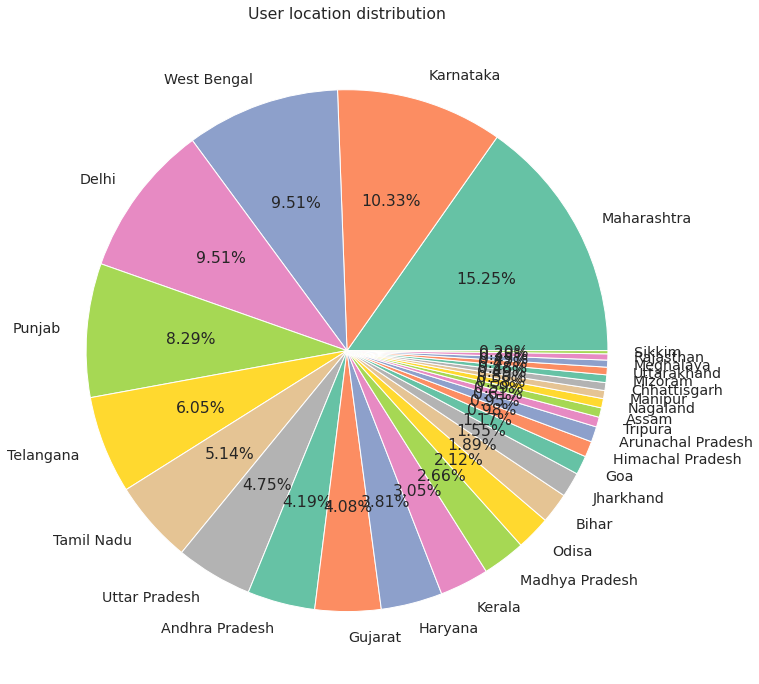

In [12]:
# check the location field and distribution on it
colors = sns.color_palette('Set2')[0:10]
plt.figure(figsize=(20, 12))
plt.pie(df_user['location'].value_counts(),
        labels=df_user['location'].value_counts().keys(),
        colors=colors,
        autopct='%0.2f%%')
plt.title('User location distribution')
plt.show()

In [13]:
df_user['location'].value_counts().sort_values(ascending=False)

Maharashtra          2111
Karnataka            1430
West Bengal          1317
Delhi                1316
Punjab               1147
Telangana             838
Tamil Nadu            711
Uttar Pradesh         658
Andhra Pradesh        580
Gujarat               565
Haryana               527
Kerala                422
Madhya Pradesh        368
Odisa                 294
Bihar                 262
Jharkhand             214
Goa                   162
Himachal Pradesh      135
Arunachal Pradesh     132
Tripura                85
Assam                  81
Nagaland               80
Manipur                69
Chhattisgarh           68
Mizoram                66
Uttarakhand            65
Meghalaya              60
Rajasthan              53
Sikkim                 27
Name: location, dtype: int64

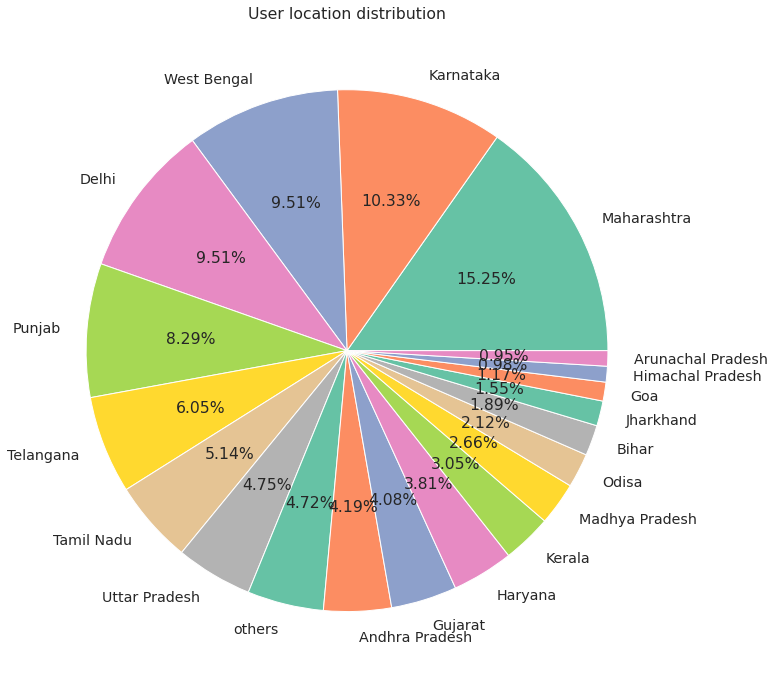

In [14]:
df_user['location'] = df_user['location'].map({'Maharashtra':'Maharashtra', 'Karnataka':'Karnataka', 'West Bengal':'West Bengal', 'Delhi':'Delhi', 'Punjab':'Punjab',
       'Telangana':'Telangana', 'Tamil Nadu':'Tamil Nadu', 'Uttar Pradesh':'Uttar Pradesh', 'Andhra Pradesh':'Andhra Pradesh', 'Gujarat':'Gujarat',
       'Haryana':'Haryana', 'Kerala':'Kerala', 'Madhya Pradesh':'Madhya Pradesh', 'Odisa':'Odisa', 'Bihar':'Bihar', 'Jharkhand':'Jharkhand',
       'Goa':'Goa', 'Himachal Pradesh':'Himachal Pradesh', 'Arunachal Pradesh':'Arunachal Pradesh', 'Tripura':'others', 'Assam':'others',
       'Nagaland':'others', 'Manipur':'others', 'Chhattisgarh':'others', 'Mizoram':'others', 'Uttarakhand':'others',
       'Meghalaya':'others', 'Rajasthan':'others', 'Sikkim':'others'})

colors = sns.color_palette('Set2')[0:10]
plt.figure(figsize=(20, 12))
plt.pie(df_user['location'].value_counts(),
        labels=df_user['location'].value_counts().keys(),
        colors=colors,
        autopct='%0.2f%%')
plt.title('User location distribution')
plt.show()

In [15]:
df_user.head()

,user_id,user_age,gender,location,joining_date,user_no,age_range
0,user_45028@domain.com,40,M,Goa,2018-06-18,45028,40-50
1,user_95235@domain.com,55,F,Andhra Pradesh,2019-09-17,95235,50-60
2,user_44289@domain.com,38,F,Goa,2018-09-03,44289,30-40
3,user_23708@domain.com,47,F,West Bengal,2020-11-15,23708,40-50
4,user_40584@domain.com,24,M,Tamil Nadu,2018-02-06,40584,20-30


##### data manipulation

In [16]:
df_user.drop('user_age', axis = 1, inplace = True)
df_user['age_range'] = df_user['age_range'].map({'0-20':0, '20-30':1, '30-40':2, '40-50':3, '50-60':4, 'Above 60':5})

In [17]:
# the field is not order based object, I used the replacing the repeated times of each value as numeric value of that
df_user['location'] = df_user['location'].map(dict(df_user['location'].value_counts()))

In [18]:
# The field is not order based, I used getdummies
df_user['gender_M'] = pd.get_dummies(df_user.gender, prefix='gender', drop_first=True)
df_user.drop('gender',axis=1,inplace=True)

In [19]:
df_user.head()

,user_id,location,joining_date,user_no,age_range,gender_M
0,user_45028@domain.com,162,2018-06-18,45028,3,1
1,user_95235@domain.com,580,2019-09-17,95235,4,0
2,user_44289@domain.com,162,2018-09-03,44289,2,0
3,user_23708@domain.com,1317,2020-11-15,23708,3,0
4,user_40584@domain.com,711,2018-02-06,40584,1,1


In this level my job with this dataset is finished and I will back to it for 'joining_date' feature to manipulate after merging data with middle dataset

#### exploration and data malipulation of df_content dataset

In [20]:
print(df_content.shape)
df_content.head()

(48645, 9)


,content_id,content_type,language,genre,duration,release_date,rating,episode_count,season_count
0,cont_475_19_32,series,english,drama,4980000,2018-07-01,10,32,19
1,cont_2185_15_21,series,english,drama,3000000,2016-03-29,4,21,15
2,cont_4857_13_28,series,tamil,comedy,3120000,2006-03-06,8,28,13
3,cont_3340_1_5,sports,hindi,cricket,9900000,2009-01-10,0,5,1
4,cont_1664_10_29,series,hindi,action,3660000,2020-05-25,2,29,10


In [21]:
df_content['content_no'] = df_content.index

In [22]:
df_content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48645 entries, 0 to 48644
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content_id     48645 non-null  object
 1   content_type   48645 non-null  object
 2   language       48645 non-null  object
 3   genre          48645 non-null  object
 4   duration       48645 non-null  int64 
 5   release_date   48645 non-null  object
 6   rating         48645 non-null  int64 
 7   episode_count  48645 non-null  int64 
 8   season_count   48645 non-null  int64 
 9   content_no     48645 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 3.7+ MB


In [23]:
# like df_user we need the numerical value for content_id so I will just created new cloumn based on the index of them
df_content['content_no'] = df_content.index

##### check distribution of object features with exploration them

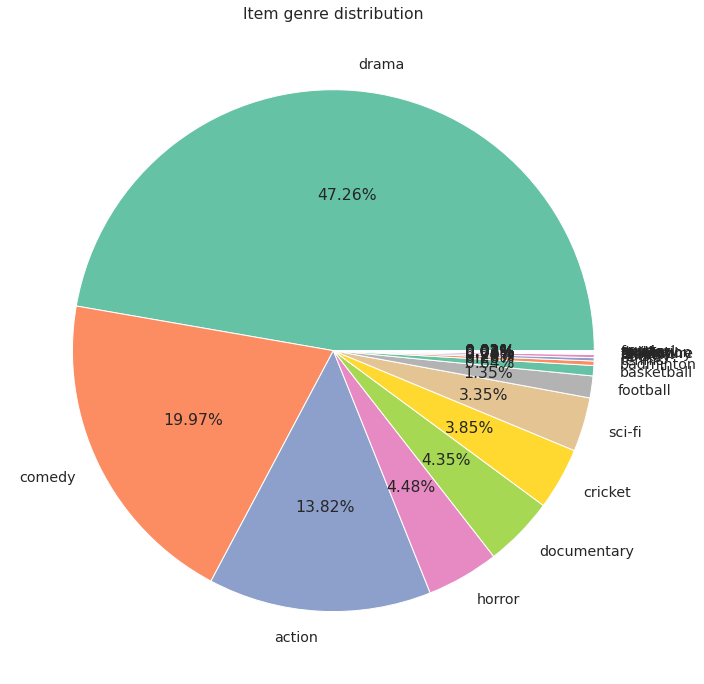

In [24]:
colors = sns.color_palette('Set2')[0:10]
plt.figure(figsize=(20, 12))
plt.pie(df_content['genre'].value_counts(),
        labels=df_content['genre'].value_counts().keys(),
        colors=colors,
        autopct='%0.2f%%')
plt.title('Item genre distribution')
plt.show()

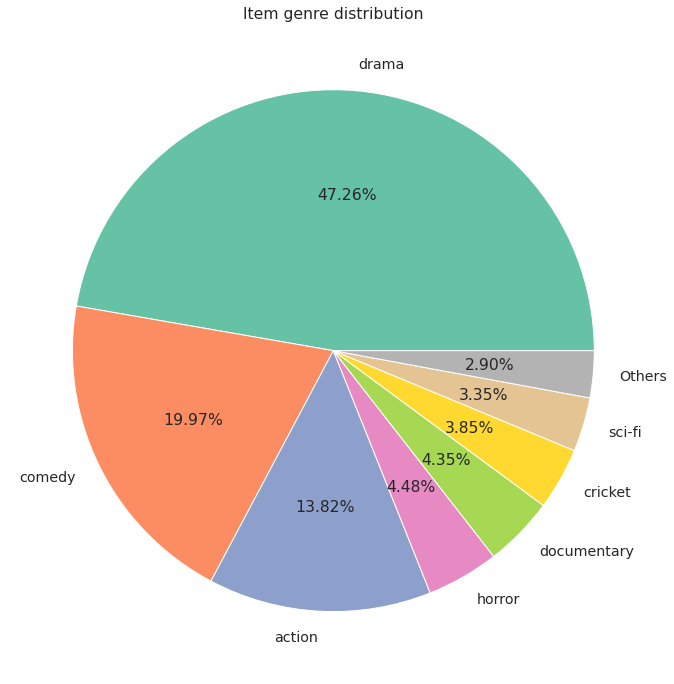

In [25]:
# for decreasing of values of object feature I just replace the low repeated object with others (give better distribution)
df_content['genre']=df_content['genre'].map({'drama':'drama', 'comedy':'comedy', 'action':'action', 'horror':'horror', 'cricket':'cricket',\
                           'documentary':'documentary','sci-fi':'sci-fi', 'football':'Others', 'basketball':'Others',\
                           'badminton':'Others', 'tennis':'Others','hockey':'Others','family':'Others', 'crime':'Others', \
                           'biography':'Others', 'fantasy':'Others', 'adventure':'Others', 'animation':'Others',\
                           'thriller':'Others', 'sport':'Others', 'musical':'Others', 'mystery':'Others'})

colors = sns.color_palette('Set2')[0:10]
plt.figure(figsize=(20, 12))
plt.pie(df_content['genre'].value_counts(),
        labels=df_content['genre'].value_counts().keys(),
        colors=colors,
        autopct='%0.2f%%')
plt.title('Item genre distribution')
plt.show()

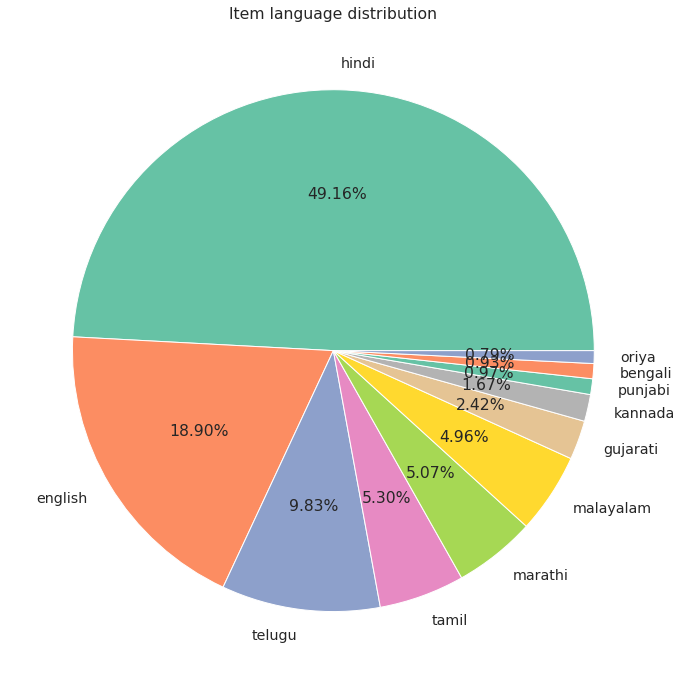

In [26]:
colors = sns.color_palette('Set2')[0:10]
plt.figure(figsize=(20, 12))
plt.pie(df_content['language'].value_counts(),
        labels=df_content['language'].value_counts().keys(),
        colors=colors,
        autopct='%0.2f%%')
plt.title('Item language distribution')
plt.show()

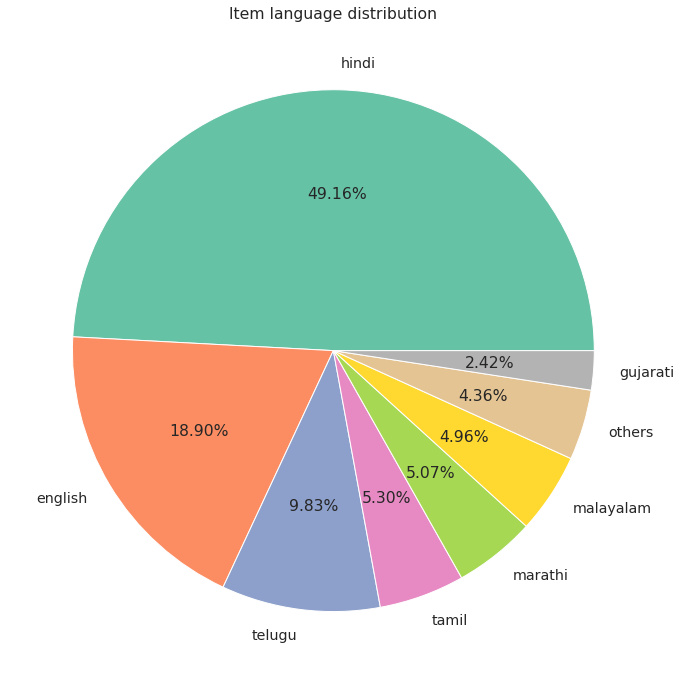

In [27]:
# for decreasing of values of object feature I just replace the low repeated object with others (give better distribution)
df_content['language'] = df_content['language'].map({'hindi': 'hindi', 'english': 'english',
 'telugu': 'telugu', 'tamil': 'tamil', 'marathi': 'marathi', 'malayalam': 'malayalam',
 'gujarati': 'gujarati', 'kannada': 'others', 'punjabi': 'others', 'bengali': 'others',
 'oriya': 'others'})

colors = sns.color_palette('Set2')[0:10]
plt.figure(figsize=(20, 12))
plt.pie(df_content['language'].value_counts(),
        labels=df_content['language'].value_counts().keys(),
        colors=colors,
        autopct='%0.2f%%')
plt.title('Item language distribution')
plt.show()

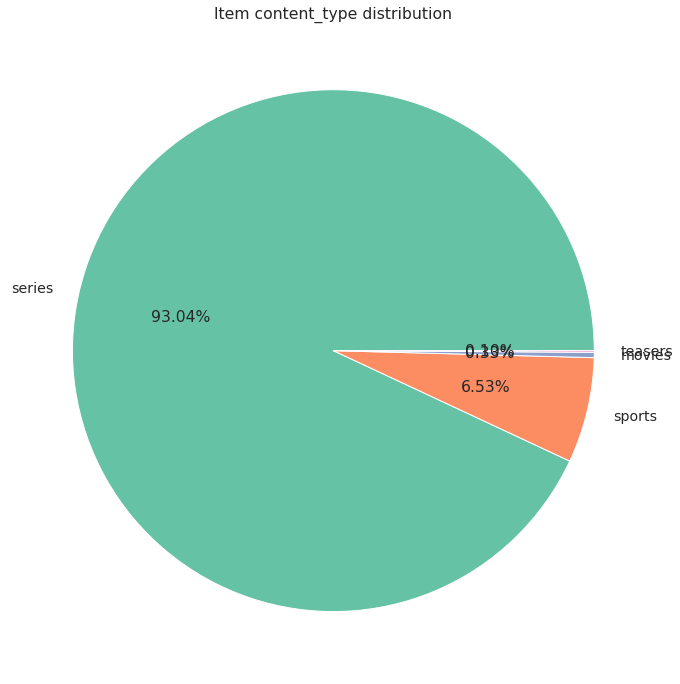

In [28]:
colors = sns.color_palette('Set2')[0:10]
plt.figure(figsize=(20, 12))
plt.pie(df_content['content_type'].value_counts(),
        labels=df_content['content_type'].value_counts().keys(),
        colors=colors,
        autopct='%0.2f%%')
plt.title('Item content_type distribution')
plt.show()

Based on above output the distribution of content_type feature is lead us to drop it

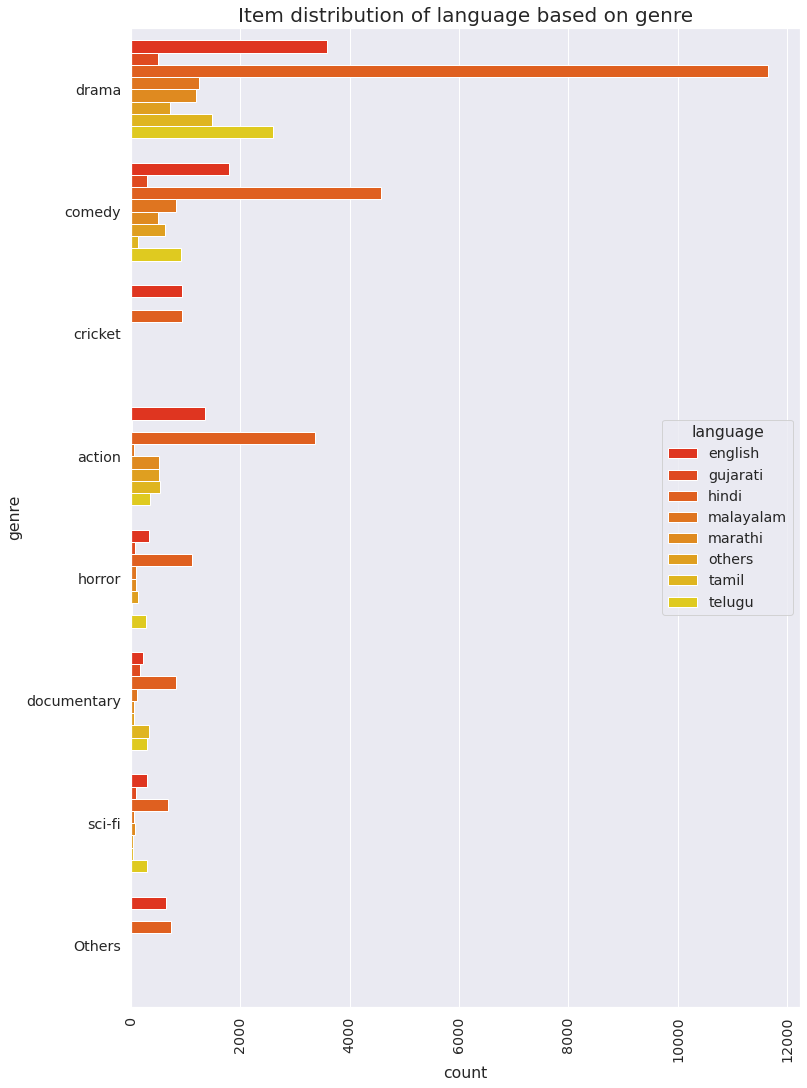

In [29]:
sns.set(font_scale=1.3)
plt.figure(figsize=(12, 18))
plt.xticks(rotation=90)
plt.title("Item distribution of language based on genre", fontsize=20)
hue_order = ['english', 'gujarati', 'hindi', 'malayalam', 'marathi', 'others',
       'tamil', 'telugu']
sns.countplot(
    y='genre',
    hue='language',
    data=df_content,
    hue_order=hue_order,
    palette='autumn')

In [30]:
# check distribution of numerical features based on genre
df_content[['rating','episode_count','season_count']].groupby(df_content.genre).agg(['min','mean','max']).T

genre                  Others     action     comedy    cricket  documentary  \
rating        min    0.000000   0.000000   0.000000   0.000000     0.000000   
              mean   0.353399   5.322278   5.325543   0.000000     5.559962   
              max   10.000000  10.000000  10.000000   0.000000    10.000000   
episode_count min    0.000000   0.000000   0.000000   1.000000     0.000000   
              mean   5.367564  18.725164  16.615567   5.686933    17.011804   
              max   20.000000  60.000000  60.000000  20.000000    57.000000   
season_count  min    0.000000   0.000000   0.000000   1.000000     0.000000   
              mean   0.920680   7.029595   7.055287   1.000000     6.511804   
              max    1.000000  34.000000  39.000000   1.000000    40.000000   

genre                   drama     horror     sci-fi  
rating        min    0.000000   0.000000   0.000000  
              mean   5.403593   5.204952   6.070509  
              max   10.000000  10.000000  10.000000  
episode_count min    0.000000   0.000000   0.000000  
              mean  16.916185  16.288400  14.006744  
              max   60.000000  58.000000  58.000000  
season_count  min    0.000000   0.000000   0.000000  
              mean   7.024270   7.241174   7.137339  
              max   44.000000  42.000000  32.000000

In [31]:
df_content.head()

,content_id,content_type,language,genre,duration,release_date,rating,episode_count,season_count,content_no
0,cont_475_19_32,series,english,drama,4980000,2018-07-01,10,32,19,0
1,cont_2185_15_21,series,english,drama,3000000,2016-03-29,4,21,15,1
2,cont_4857_13_28,series,tamil,comedy,3120000,2006-03-06,8,28,13,2
3,cont_3340_1_5,sports,hindi,cricket,9900000,2009-01-10,0,5,1,3
4,cont_1664_10_29,series,hindi,action,3660000,2020-05-25,2,29,10,4


##### Data Manipulation - object feauters

In [32]:
# drop the feature based on distribution
item_vecs = df_content.drop(['content_type'],axis=1)

# change the object to numerical based on the repeated time in the feature
item_vecs['genre'] = item_vecs['genre'].map(dict(item_vecs['genre'].value_counts()))
item_vecs['language'] = item_vecs['language'].map(dict(item_vecs['language'].value_counts()))

In this level my job with this dataset is finished and I will back to it for 'release_date' feature to manipulate after merging data with middle dataset

#### exploration and data malipulation of df_relation dataset

In [33]:
print(df_relation.shape)
df_relation.head()

(1654450, 6)


,user_id,content_id,duration,date,start_time,end_time
0,user_44902@domain.com,cont_1718_16_7,1920000,2020-06-17,06:19:13,06:51:13
1,user_87018@domain.com,cont_825_1_3,1080000,2019-12-06,19:58:14,20:16:14
2,user_53430@domain.com,cont_1981_2_26,180000,2020-07-27,01:52:51,01:55:51
3,user_53696@domain.com,cont_1072_18_7,1440000,2021-08-24,06:34:14,06:58:14
4,user_80251@domain.com,cont_760_9_27,960000,2020-06-15,16:57:19,17:13:19


In this dataset, we have relation between content and user, it means the content is watched by user

In [34]:
ten_most_popular_content = df_relation['content_id'].groupby(df_relation.content_id).count().sort_values(ascending=False)[:10]

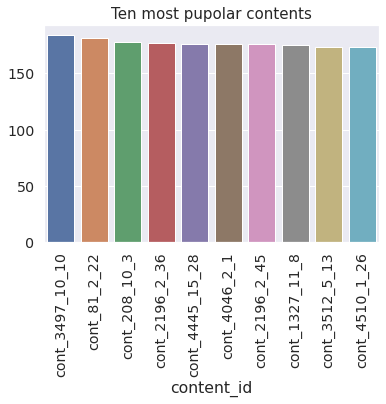

In [35]:
plt.xticks(rotation=90)
plt.title("Ten most pupolar contents", fontsize=15)
sns.barplot(x=ten_most_popular_content.index,y=ten_most_popular_content.values)

In [36]:
df_relation['Daily_Start_Time'] = pd.to_datetime(df_relation['start_time'], format='%H:%M:%S').dt.hour
df_relation['Daily_Spending_Time'] = pd.to_datetime(df_relation['end_time'], format='%H:%M:%S') - pd.to_datetime(df_relation['start_time'], format='%H:%M:%S')

In [37]:
df_relation.head()

,user_id,content_id,duration,date,start_time,end_time,Daily_Start_Time,Daily_Spending_Time
0,user_44902@domain.com,cont_1718_16_7,1920000,2020-06-17,06:19:13,06:51:13,6,0 days 00:32:00
1,user_87018@domain.com,cont_825_1_3,1080000,2019-12-06,19:58:14,20:16:14,19,0 days 00:18:00
2,user_53430@domain.com,cont_1981_2_26,180000,2020-07-27,01:52:51,01:55:51,1,0 days 00:03:00
3,user_53696@domain.com,cont_1072_18_7,1440000,2021-08-24,06:34:14,06:58:14,6,0 days 00:24:00
4,user_80251@domain.com,cont_760_9_27,960000,2020-06-15,16:57:19,17:13:19,16,0 days 00:16:00


As checked the value of some difference have -1 days regarding to 0 - 23, so I tried to update all of them with 'apply' function that was unsuccessful, so I just separate them and update them and concat to main again

In [38]:
import datetime
df_relation_b = df_relation.loc[df_relation['Daily_Spending_Time'].dt.days == -1].copy()
df_relation_b['Daily_Spending_Time'] = df_relation_b['Daily_Spending_Time'] + datetime.timedelta(days=1)

In [39]:
df_relation.drop(df_relation.loc[df_relation['Daily_Spending_Time'].dt.days == -1].index, axis = 0, inplace = True)

In [40]:
df_relation = pd.concat([df_relation,df_relation_b],axis=0)

In [41]:
# don't run out of order
df_relation['daily_spending_time_per_sec'] = df_relation.Daily_Spending_Time.values.astype(np.int64) // 10 ** 9

In [42]:
def group_hour_day(row):
  if row['Daily_Start_Time'] in range(0, 4):
    hour_g = '0-4'
  elif row['Daily_Start_Time'] in range(4, 8):
    hour_g = '4-8'
  elif row['Daily_Start_Time'] in range(8, 12):
    hour_g = '8-12'
  elif row['Daily_Start_Time'] in range(12, 16):
    hour_g = '12-16'
  elif row['Daily_Start_Time'] in range(16, 20):
    hour_g = '16-20'
  elif row['Daily_Start_Time'] in range(20, 24):
    hour_g = '20-24'
  return hour_g


df_relation["hour_group"] = df_relation.apply(group_hour_day, axis=1)

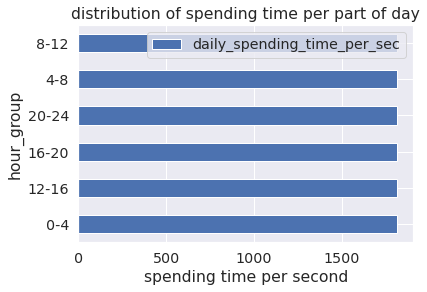

In [43]:
df_relation[['hour_group','daily_spending_time_per_sec']].groupby(df_relation.hour_group).mean().plot(kind='barh')
plt.title('distribution of spending time per part of day')
plt.xlabel('spending time per second')
plt.show()

##### Data manipulation - df_relation

In [44]:
df_relation.head()

,user_id,content_id,duration,date,start_time,end_time,Daily_Start_Time,Daily_Spending_Time,daily_spending_time_per_sec,hour_group
0,user_44902@domain.com,cont_1718_16_7,1920000,2020-06-17,06:19:13,06:51:13,6,0 days 00:32:00,1920,4-8
1,user_87018@domain.com,cont_825_1_3,1080000,2019-12-06,19:58:14,20:16:14,19,0 days 00:18:00,1080,16-20
2,user_53430@domain.com,cont_1981_2_26,180000,2020-07-27,01:52:51,01:55:51,1,0 days 00:03:00,180,0-4
3,user_53696@domain.com,cont_1072_18_7,1440000,2021-08-24,06:34:14,06:58:14,6,0 days 00:24:00,1440,4-8
4,user_80251@domain.com,cont_760_9_27,960000,2020-06-15,16:57:19,17:13:19,16,0 days 00:16:00,960,16-20


In [45]:
# drop he features not need anymore
df_relation.drop(['start_time','end_time','Daily_Start_Time','Daily_Spending_Time']
                 ,axis=1, inplace=True)
# updating order base hour_group to numeric
df_relation['hour_group'] = df_relation['hour_group'].map({'0-4':0, '4-8':1, '8-12':2, '12-16':3, '16-20':4, '20-24':5})

In [46]:
df_relation.head()

,user_id,content_id,duration,date,daily_spending_time_per_sec,hour_group
0,user_44902@domain.com,cont_1718_16_7,1920000,2020-06-17,1920,1
1,user_87018@domain.com,cont_825_1_3,1080000,2019-12-06,1080,4
2,user_53430@domain.com,cont_1981_2_26,180000,2020-07-27,180,0
3,user_53696@domain.com,cont_1072_18_7,1440000,2021-08-24,1440,1
4,user_80251@domain.com,cont_760_9_27,960000,2020-06-15,960,4


In this level my job with this dataset is finished and I will back to it for 'date' feature to manipulate after merging data with middle dataset

### Merging Dataset to get the user_train and item_train matrix

#### User_train

In [47]:
user_train = pd.merge(df_relation, df_user, on='user_id')
user_train.head()

,user_id,content_id,duration,date,daily_spending_time_per_sec,hour_group,location,joining_date,user_no,age_range,gender_M
0,user_44902@domain.com,cont_1718_16_7,1920000,2020-06-17,1920,1,654,2018-11-21,44902,4,0
1,user_44902@domain.com,cont_1130_6_13,960000,2019-10-19,960,1,654,2018-11-21,44902,4,0
2,user_44902@domain.com,cont_1310_9_17,2100000,2019-09-27,2100,1,654,2018-11-21,44902,4,0
3,user_44902@domain.com,cont_1368_4_26,60000,2019-12-11,60,4,654,2018-11-21,44902,4,0
4,user_44902@domain.com,cont_636_1_1,2640000,2020-09-12,2640,5,654,2018-11-21,44902,4,0


In [48]:
user_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1654450 entries, 0 to 1654449
Data columns (total 11 columns):
 #   Column                       Non-Null Count    Dtype 
---  ------                       --------------    ----- 
 0   user_id                      1654450 non-null  object
 1   content_id                   1654450 non-null  object
 2   duration                     1654450 non-null  int64 
 3   date                         1654450 non-null  object
 4   daily_spending_time_per_sec  1654450 non-null  int64 
 5   hour_group                   1654450 non-null  int64 
 6   location                     1654450 non-null  int64 
 7   joining_date                 1654450 non-null  object
 8   user_no                      1654450 non-null  int64 
 9   age_range                    1654450 non-null  int64 
 10  gender_M                     1654450 non-null  uint8 
dtypes: int64(6), object(4), uint8(1)
memory usage: 140.4+ MB


except user_id and content_id that will drop we still have two other object features that should handle them

In [49]:
# finding the difference of dates that user joined and watched content
user_train['joining_date'] = pd.to_datetime(user_train['joining_date'])
user_train['date'] = pd.to_datetime(user_train['date'])

user_train['user_joined_watched'] = (user_train['date'] - user_train['joining_date']).dt.days

In [50]:
#drop no need features and check the final version of user_train to give ML
user_train.drop(['content_id','user_id','joining_date','date'],axis =1, inplace = True)
#'duration' feature is not part of user_train data
user_train.drop('duration',axis =1, inplace = True)
# reorder the features
user_train = user_train[['user_no','daily_spending_time_per_sec','hour_group','location','age_range','gender_M','user_joined_watched']]
user_train.head()

,user_no,daily_spending_time_per_sec,hour_group,location,age_range,gender_M,user_joined_watched
0,44902,1920,1,654,4,0,574
1,44902,960,1,654,4,0,332
2,44902,2100,1,654,4,0,310
3,44902,60,4,654,4,0,385
4,44902,2640,5,654,4,0,661


#### Item_train

In [51]:
item_train = pd.merge(df_relation, item_vecs, on='content_id')
item_train.head()

,user_id,content_id,duration_x,date,daily_spending_time_per_sec,hour_group,language,genre,duration_y,release_date,rating,episode_count,season_count,content_no
0,user_44902@domain.com,cont_1718_16_7,1920000,2020-06-17,1920,1,23912,22991,2880000,2012-04-23,6,7,16,34274
1,user_16534@domain.com,cont_1718_16_7,1320000,2021-03-09,1320,2,23912,22991,2880000,2012-04-23,6,7,16,34274
2,user_33550@domain.com,cont_1718_16_7,1800000,2018-05-06,1800,3,23912,22991,2880000,2012-04-23,6,7,16,34274
3,user_75701@domain.com,cont_1718_16_7,2640000,2020-07-12,2640,5,23912,22991,2880000,2012-04-23,6,7,16,34274
4,user_63713@domain.com,cont_1718_16_7,540000,2021-12-24,540,5,23912,22991,2880000,2012-04-23,6,7,16,34274


In [52]:
item_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1654450 entries, 0 to 1654449
Data columns (total 14 columns):
 #   Column                       Non-Null Count    Dtype 
---  ------                       --------------    ----- 
 0   user_id                      1654450 non-null  object
 1   content_id                   1654450 non-null  object
 2   duration_x                   1654450 non-null  int64 
 3   date                         1654450 non-null  object
 4   daily_spending_time_per_sec  1654450 non-null  int64 
 5   hour_group                   1654450 non-null  int64 
 6   language                     1654450 non-null  int64 
 7   genre                        1654450 non-null  int64 
 8   duration_y                   1654450 non-null  int64 
 9   release_date                 1654450 non-null  object
 10  rating                       1654450 non-null  int64 
 11  episode_count                1654450 non-null  int64 
 12  season_count                 1654450 non-null  int64 
 1

The plan is 

1.   handling of 'release_date' and 'date' create new feature with name 'diff_released_watched'
2.   provide the precentage of watched the content with each user



In [53]:
item_train['release_date'] = pd.to_datetime(item_train['release_date'])
item_train['date'] = pd.to_datetime(item_train['date'])

item_train['diff_released_watched'] = (item_train['date'] - item_train['release_date']).dt.days
# drop the no needed 'date' and 'release_date'
item_train.drop(['date','release_date'], axis= 1, inplace = True)

In [54]:
item_train['watched_precentage'] = (item_train.duration_y - item_train.duration_x) / item_train.duration_y
# drop no needed features
item_train.drop(['duration_x','duration_y'],axis=1,inplace=True)

In [55]:
# ignoring 'content_id','user_id' and the user feature related fields 'daily_spending_time_per_sec', 'hour_group'
item_train = item_train[['content_no', 'language', 'genre', 'rating', 'episode_count', 'season_count',
            'diff_released_watched', 'watched_precentage']]
# item_train is ready as well
item_train.head()

,content_no,language,genre,rating,episode_count,season_count,diff_released_watched,watched_precentage
0,34274,23912,22991,6,7,16,2977,0.333333
1,34274,23912,22991,6,7,16,3242,0.541667
2,34274,23912,22991,6,7,16,2204,0.375000
3,34274,23912,22991,6,7,16,3002,0.083333
4,34274,23912,22991,6,7,16,3532,0.812500


## Creting and Learning Model part

In [56]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [57]:
# create backup from item_train and user_train dataset
item_train_p1 = item_train.copy()
user_train_p1 = user_train.copy()

#### preparation

In [58]:
# scaled data
item_train_scaled = item_train.drop('rating',axis=1)
user_train_scaled = user_train
y_train_scaled    = pd.DataFrame(item_train.rating)


scalerItem = StandardScaler()
scalerItem.fit(item_train_scaled)
item_train = scalerItem.transform(item_train_scaled)

scalerUser = StandardScaler()
scalerUser.fit(user_train_scaled)
user_train = scalerUser.transform(user_train_scaled)

scalerTarget = MinMaxScaler((-1,1))
scalerTarget.fit(y_train_scaled)
y_train = scalerTarget.transform(y_train_scaled)

# checked the scaling job
print(np.allclose(item_train_scaled, scalerItem.inverse_transform(item_train)))
print(np.allclose(user_train_scaled, scalerUser.inverse_transform(user_train)))

True
True


In [59]:
print(item_train.shape)
print(user_train.shape)
print(y_train.shape)

(1654450, 7)
(1654450, 7)
(1654450, 1)


In [60]:
# the dataset are big so using of 95% of them for trining and 5% for testing is reasonable
item_train, item_test = train_test_split(item_train, train_size=0.95, shuffle=True, random_state=1)
user_train, user_test = train_test_split(user_train, train_size=0.95, shuffle=True, random_state=1)
y_train, y_test       = train_test_split(y_train,    train_size=0.95, shuffle=True, random_state=1)
print(f"movie/item training data shape: {item_train.shape}")
print(f"movie/item test data shape: {item_test.shape}")

movie/item training data shape: (1571727, 7)
movie/item test data shape: (82723, 7)


In [61]:
# define some variables
num_user_features = user_train.shape[1] - 1
num_item_features = item_train.shape[1] - 1
i_s, u_s = 1, 1

#### modeling and trainig

In [62]:
num_outputs = 32
tf.random.set_seed(1)
user_NN = tf.keras.models.Sequential([ 
  
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(num_outputs),

])

item_NN = tf.keras.models.Sequential([
  
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(num_outputs),

])
  

# create the user input and point to the base network
input_user = tf.keras.layers.Input(shape=(num_user_features))
vu = user_NN(input_user)
vu = tf.linalg.l2_normalize(vu, axis=1)

# create the item input and point to the base network
input_item = tf.keras.layers.Input(shape=(num_item_features))
vm = item_NN(input_item)
vm = tf.linalg.l2_normalize(vm, axis=1)

# compute the dot product of the two vectors vu and vm
output = tf.keras.layers.Dot(axes=1)([vu, vm])

# specify the inputs and output of the model
model = tf.keras.Model([input_user, input_item], output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential (Sequential)        (None, 32)           42144       ['input_1[0][0]']                
                                                                                                  
 sequential_1 (Sequential)      (None, 32)           42144       ['input_2[0][0]']                
                                                                                              

In [63]:
tf.random.set_seed(1)
cost_fn = tf.keras.losses.MeanSquaredError()
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,
              loss=cost_fn)

In [64]:
tf.random.set_seed(1)
model.fit([user_train[:, u_s:], item_train[:, i_s:]], y_train, epochs=10)

Epoch 1/10
49117/49117 [==============================] - 195s 4ms/step - loss: 0.2735
Epoch 2/10
49117/49117 [==============================] - 186s 4ms/step - loss: 0.2424
Epoch 3/10
49117/49117 [==============================] - 190s 4ms/step - loss: 0.2300
Epoch 4/10
49117/49117 [==============================] - 192s 4ms/step - loss: 0.2226
Epoch 5/10
49117/49117 [==============================] - 183s 4ms/step - loss: 0.2170
Epoch 6/10
49117/49117 [==============================] - 190s 4ms/step - loss: 0.2127
Epoch 7/10
49117/49117 [==============================] - 190s 4ms/step - loss: 0.2092
Epoch 8/10
49117/49117 [==============================] - 183s 4ms/step - loss: 0.2065
Epoch 9/10
49117/49117 [==============================] - 184s 4ms/step - loss: 0.2038
Epoch 10/10
49117/49117 [==============================] - 177s 4ms/step - loss: 0.2017


In [65]:
model.evaluate([user_test[:, u_s:], item_test[:, i_s:]], y_test)

2586/2586 [==============================] - 5s 2ms/step - loss: 0.2022


0.2022329568862915

### Prediction

#### creating v_u and v_m the output matrix of each side of NN

In [66]:
#create user and item vectors
## use the mean of 'diff_released_watched' & 'watched_precentage' features for each content
item_vecs = item_train_scaled[['content_no', 'language', 'genre', 'episode_count', 'season_count',
       'diff_released_watched', 'watched_precentage']].groupby(
    item_train_scaled['content_no']).agg('mean').drop('content_no',axis=1).reset_index()

## use the mean of 'daily_spending_time_per_sec' & 'hour_group' features for each user
user_vecs = user_train_scaled[['user_no', 'daily_spending_time_per_sec', 'hour_group', 'location',
       'age_range', 'gender_M', 'user_joined_watched']].groupby(
    user_train_scaled['user_no']).agg('mean').drop('user_no',axis=1).reset_index()

In [67]:
# Define part of model for predicting output matrix from item_vecs
input_item_m = tf.keras.layers.Input(shape=(num_item_features))    
vm_m = item_NN(input_item_m)                                      
vm_m = tf.linalg.l2_normalize(vm_m, axis=1)                        
model_m = tf.keras.Model(input_item_m, vm_m)                                
model_m.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 6)]               0         
                                                                 
 sequential_1 (Sequential)   (None, 32)                42144     
                                                                 
 tf.math.l2_normalize_2 (TFO  (None, 32)               0         
 pLambda)                                                        
                                                                 
Total params: 42,144
Trainable params: 42,144
Non-trainable params: 0
_________________________________________________________________


In [68]:
# predict output matrix
scaled_item_vecs = scalerItem.transform(item_vecs)
vms = model_m.predict(scaled_item_vecs[:,i_s:])
print(f"size of all predicted movie feature vectors: {vms.shape}")

1382/1382 [==============================] - 2s 1ms/step
size of all predicted movie feature vectors: (44223, 32)


In [69]:
# Define part of model for predicting output matrix from item_vecs
input_user_m = tf.keras.layers.Input(shape=(num_user_features))    
vu_m = item_NN(input_user_m)                                      
vu_m = tf.linalg.l2_normalize(vu_m, axis=1)                        
model_u = tf.keras.Model(input_user_m, vu_m)                                
model_u.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 6)]               0         
                                                                 
 sequential_1 (Sequential)   (None, 32)                42144     
                                                                 
 tf.math.l2_normalize_3 (TFO  (None, 32)               0         
 pLambda)                                                        
                                                                 
Total params: 42,144
Trainable params: 42,144
Non-trainable params: 0
_________________________________________________________________


In [70]:
scaled_user_vecs = scalerUser.transform(user_vecs)
vus = model_u.predict(scaled_user_vecs[:,u_s:])
print(f"size of all predicted user feature vectors: {vus.shape}")

342/342 [==============================] - 1s 2ms/step
size of all predicted user feature vectors: (10923, 32)


#### predection new user

In [71]:
# define new user based on user_train data
user_no = 10000
daily_spending_time_per_sec = 220
hour_group = 4
location = 654
age_range = 3
gender_M = 1
user_joined_watched = 235

user_vec = np.array([[user_no, daily_spending_time_per_sec, hour_group, location, age_range, gender_M, user_joined_watched]])

In [72]:
# repeated user_vec to achieve number of item can push to algorithm for learning
user_vecs_s = np.repeat(user_vec,len(item_vecs), axis = 0)

# scaler based on current fitted scaler for user_train and item_train
suser_vecs = scalerUser.transform(user_vecs_s)
sitem_vecs = scalerItem.transform(item_vecs)

# predecting based on the scalered data
y_p = model.predict([suser_vecs[:, u_s:], sitem_vecs[:, i_s:]])

# reverse the sclare to recieve real value
y_pu = scalerTarget.inverse_transform(y_p)

# sort the results, highest prediction first
sorted_index = np.argsort(-y_pu,axis=0).reshape(-1).tolist()  #negate to get largest rating first
sorted_items = item_vecs.iloc[sorted_index][:10] # 10 most related content to new user

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1382/1382 [==============================] - 4s 3ms/step


In [73]:
sorted_items

,content_no,language,genre,episode_count,season_count,diff_released_watched,watched_precentage
11424,12590,4781.0,2181.0,41.0,1.0,4862.058824,0.508114
38304,42099,4781.0,2181.0,40.0,3.0,3461.536585,0.474945
23260,25586,4781.0,2181.0,42.0,3.0,3431.850000,0.459091
30844,33908,4781.0,2181.0,43.0,5.0,2027.594595,0.540541
24595,27063,4781.0,2181.0,46.0,5.0,2063.513514,0.435936
4436,4930,4781.0,2181.0,44.0,3.0,3296.743590,0.517949
40730,44772,2122.0,9713.0,5.0,9.0,1304.267857,0.496126
14867,16386,2122.0,9713.0,4.0,9.0,1290.417219,0.506025
31359,34471,4781.0,2181.0,43.0,4.0,2632.560000,0.503774
11239,12389,4781.0,2181.0,41.0,4.0,2634.684211,0.451665


#### find the similarity content

In [74]:
import tabulate

# Define Distance definition for find the nearest v_m and v_u
def sq_dist(a,b):
    d=np.sum(np.square(a-b))     
    return d

In [75]:
print(vms.shape)
print(vus.shape)

(44223, 32)
(10923, 32)


In [76]:
# because the RAM issue to run remain parts, for some parts I will use the part of vms
vms_p1 =  vms[:10923]

In [ ]:
count = 10  # number of movies to display
dim = len(vms_p1)
dist = np.zeros((dim,dim))

for i in range(dim):
    for j in range(dim):
        dist[i,j] = sq_dist(vms_p1[i, :], vms_p1[j, :])
        
m_dist = np.ma.masked_array(dist, mask=np.identity(dist.shape[0]))  # mask the diagonal

n = 3
disp = [["content1", "content2", "content3"]]
for i in range(count):
    min_indices = np.argpartition(dist[i],n-1)[:n]
    min_values = dist[i][min_indices]
    sorted_min_indices = min_indices[np.argsort(min_values)]
    content1_no = int(item_vecs.iloc[i,0])
    content2_no = int(item_vecs.iloc[min_indices[1],0])
    content3_no = int(item_vecs.iloc[min_indices[2],0])
    disp.append( [df_content[['content_id']].loc[df_content['content_no'] == content1_no],
                  df_content[['content_id']].loc[df_content['content_no'] == content2_no],
                  df_content[['content_id']].loc[df_content['content_no'] == content3_no]]
               )
table = tabulate.tabulate(disp, headers="firstrow",numalign='center')
print(table)

The Above cell run with part of vms matrix, so the output is not trustable
(RAM issue)



#### find the similarity users

In [ ]:
count = 10  # number of movies to display
dim = len(vus)
dist = np.zeros((dim,dim))

for i in range(dim):
    for j in range(dim):
        dist[i,j] = sq_dist(vus[i, :], vus[j, :])
        
m_dist = np.ma.masked_array(dist, mask=np.identity(dist.shape[0]))  # mask the diagonal

n = 3
disp = [["User1", "User2", "User3"]]
for i in range(count):
    min_indices = np.argpartition(dist[i],n-1)[:n]
    min_values = dist[i][min_indices]
    sorted_min_indices = min_indices[np.argsort(min_values)]
    user1_no = int(item_vecs.iloc[i,0])
    user2_no = int(item_vecs.iloc[min_indices[1],0])
    user3_no = int(item_vecs.iloc[min_indices[2],0])
    disp.append( [df_user[['user_id']].loc[df_user['user_no'] == user1_no],
                  df_user[['user_id']].loc[df_user['user_no'] == user2_no],
                  df_user[['user_id']].loc[df_user['user_no'] == user3_no]]
               )
table = tabulate.tabulate(disp, headers="firstrow",numalign='center')
print(table)

## clustering the vms & vus 

In [ ]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

#### **Item** part

In [ ]:
#For doing the clustering based on less features, I will checked the PCA affect on 16 features
pca_16 = PCA(n_components=16, whiten=True).fit(vms_p1)
print(sum(pca_16.explained_variance_ratio_))

In [ ]:
X = pca_16.fit_transform(vms_p1)
clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(X) # to find the number of cluster

plt.figure(figsize=(20, 18))
plot_dendrogram(clustering)
plt.title("Item Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node")
plt.show()


In [ ]:
item_kmeans = KMeans(n_clusters=9, n_init = 20).fit(X) # The Number of cluster is choice based on output graph of Hierarchical Clustering Dendrogram

In [ ]:
df_vms_p1 = pd.DataFrame(vms_p1)
labels = pd.DataFrame(item_kmeans.labels_, columns=['label'])

In [ ]:
vms_p1_c = pd.concat([labels, df_vms_p1], axis = 1)

#### **User** Part

In [ ]:
#For doing the clustering based on less features, I will checked the PCA affect on 16 features
pca_16 = PCA(n_components=16, whiten=True).fit(vus)
print(sum(pca_16.explained_variance_ratio_))

In [ ]:
X = pca_16.fit_transform(vus)
clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(X) # to find the number of cluster

plt.figure(figsize=(20, 18))
plot_dendrogram(clustering)
plt.title("Item Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node")
plt.show()

In [ ]:
user_kmeans = KMeans(n_clusters=13, n_init = 20).fit(X) # The Number of cluster is choice based on output graph of Hierarchical Clustering Dendrogram

In [ ]:
df_vus = pd.DataFrame(vus)
labels = pd.DataFrame(user_kmeans.labels_, columns=['label'])
vus_c = pd.concat([labels, df_vus], axis = 1)

## Use Dimensionality_Reduction technics to plot the output matrix (vus_c,vms_p1_c) per finding cluster_id in previous steps

In [ ]:
!pip install plotly

In [ ]:
#PCA
from sklearn.decomposition import PCA
#TSNE
from sklearn.manifold import TSNE
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#For Plotting
import plotly.io as plt_io
import plotly.graph_objects as go
%matplotlib inline

In [ ]:
# define the 2D and 3D plot function
def plot_2d(component1, component2):
    
    fig = go.Figure(data=go.Scatter(
        x = component1,
        y = component2,
        mode='markers',
        marker=dict(
            size=20,
            color=y, #set color equal to a variable
            colorscale='Rainbow', # one of plotly colorscales
            showscale=True,
            line_width=1
        )
    ))
    fig.update_layout(margin=dict( l=100,r=100,b=100,t=100),width=2000,height=1200)                 
    fig.layout.template = 'plotly_dark'
    
    fig.show()

def plot_3d(component1,component2,component3):
    fig = go.Figure(data=[go.Scatter3d(
        x=component1,
        y=component2,
        z=component3,
        mode='markers',
        marker=dict(
            size=10,
            color=y,                # set color to an array/list of desired values
            colorscale='Rainbow',   # choose a colorscale
            opacity=1,
            line_width=1
        )
    )])
# tight layout
    fig.update_layout(margin=dict(l=50,r=50,b=50,t=50),width=1800,height=1000)
    fig.layout.template = 'plotly_dark'
    
    fig.show()

Our data is the scaler already so we don't need that part

#### Graphing for Item

In [ ]:
x = vms_p1_c.drop('label', axis = 1)
y = vms_p1_c.label

In [ ]:
# Simple PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principal = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

plot_2d(principalComponents[:, 0],principalComponents[:, 1])

In [ ]:
plot_3d(principalComponents[:, 0],principalComponents[:, 1],principalComponents[:, 2])

In [ ]:
# check the half features PCA
pca_16 = PCA(n_components=16, whiten=True).fit(x)
print(sum(pca_16.explained_variance_ratio_))

the TSNE job took to much time, so I checked with half of my features how much I will use and it is acceptable, so I use the pca_16 instead of pca_32
the best exprience is use the all features as input and output dimension of PCA to keep all data with the new dimension

In [ ]:
# TSNE
pca_16  = PCA(n_components=16)
pca_result_16 = pca_16.fit_transform(x)
tsne = TSNE(random_state = 42, n_components=3,verbose=0, perplexity=40, n_iter=400).fit_transform(pca_result_16)

plot_2d(tsne[:, 0],tsne[:, 1])

In [ ]:
plot_3d(tsne[:, 0],tsne[:, 1],tsne[:, 2])

In [ ]:
X_LDA = LDA(n_components=3).fit_transform(x,y)

plot_2d(X_LDA[:, 0],X_LDA[:, 1])

In [ ]:
plot_3d(X_LDA[:, 0],X_LDA[:, 1],X_LDA[:, 2])

The output graph is not suitable because we work with part of data not all of that

#### Graphing User

In [ ]:
x = vus_c.drop('label',axis=1)
y = vus_c.label

In [ ]:
# Simple PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principal = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

plot_2d(principalComponents[:, 0],principalComponents[:, 1])

In [ ]:
plot_3d(principalComponents[:, 0],principalComponents[:, 1],principalComponents[:, 2])

In [ ]:
# TSNE
# we need to use pca in all features with job we simply change the dimention of our vectors
pca_32 = PCA(n_components=32)
pca_result_32 = pca_32.fit_transform(x)
tsne = TSNE(random_state = 42, n_components=3,verbose=0, perplexity=40, n_iter=400).fit_transform(pca_result_32)

plot_2d(tsne[:, 0],tsne[:, 1])

In [ ]:
plot_3d(tsne[:, 0],tsne[:, 1],tsne[:, 2])

In [ ]:
X_LDA = LDA(n_components=3).fit_transform(x,y)

plot_2d(X_LDA[:, 0],X_LDA[:, 1])

In [ ]:
plot_3d(X_LDA[:, 0],X_LDA[:, 1],X_LDA[:, 2])

It is great output graph